# groupby DataFrame

In [1]:
import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [2]:
g = df.groupby("city")
g

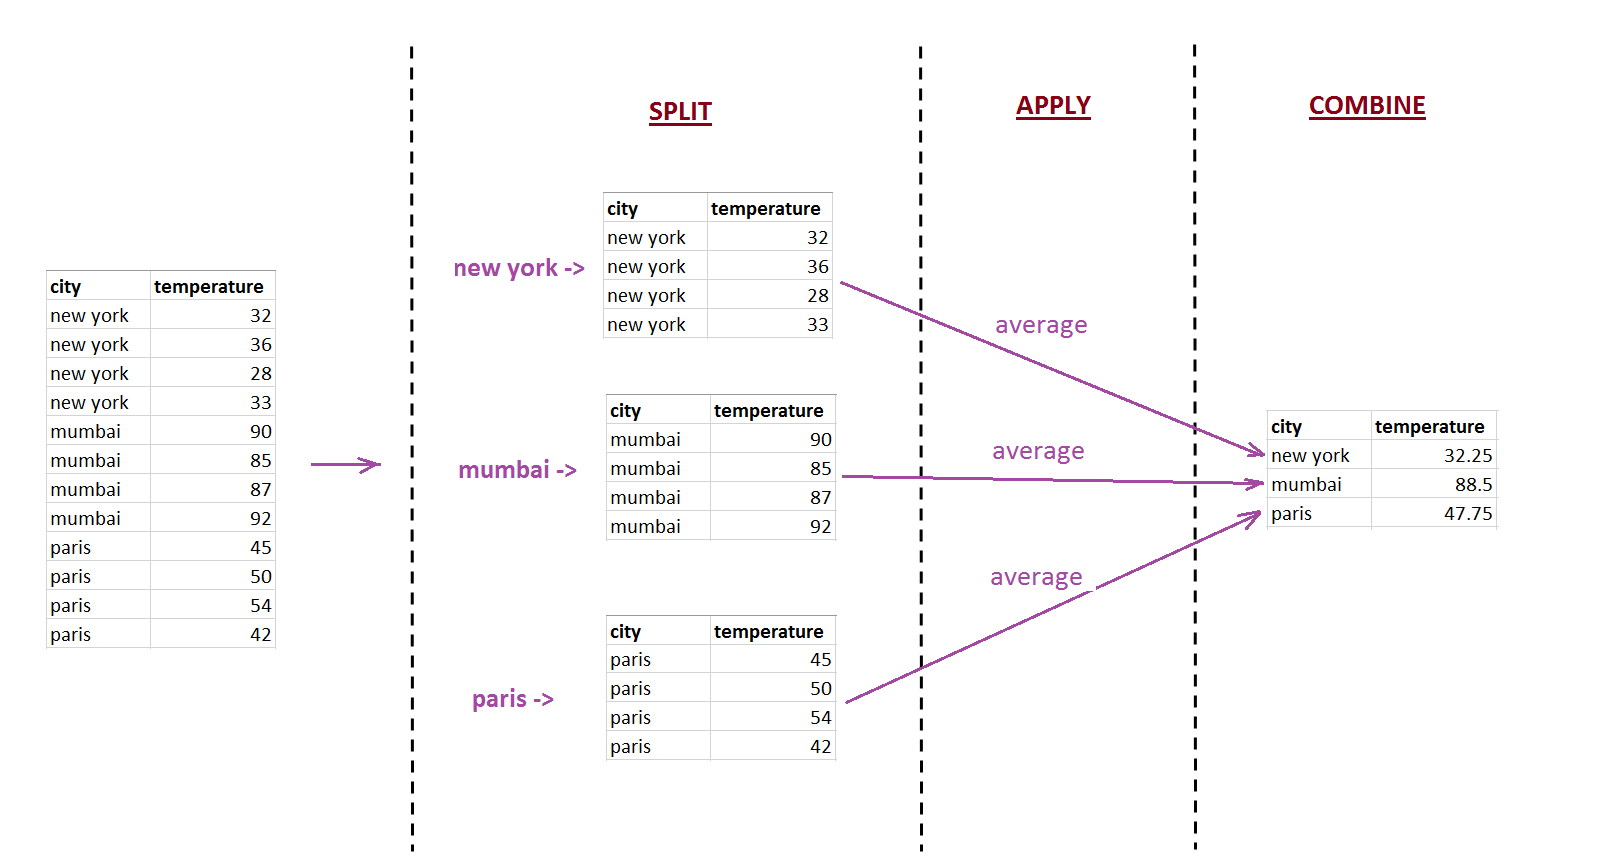

In [4]:
from IPython.display import Image
Image(filename='split_apply_combine.png')  # DataFrameGroupBy object looks something like below

In [6]:
for city, data in g:                 #This is similar to SQL, SELECT * from weather_data GROUP BY city
    print("city:",city)
    print("\n")
    print("data:",data)

city: mumbai


data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [7]:
g.get_group('mumbai')      # this function will return a dataframe cotaining mumbai;s cities information

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [8]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [9]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [10]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

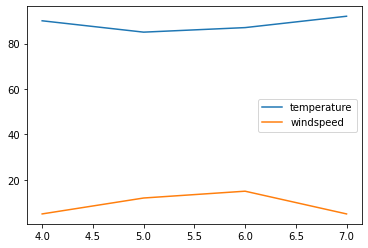

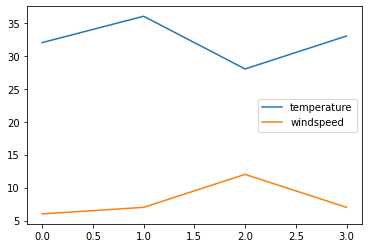

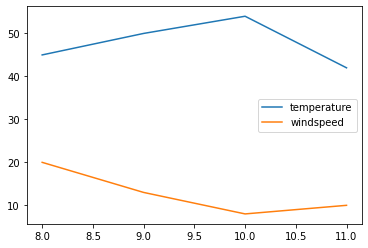

In [11]:
%matplotlib inline
g.plot()

### Custom grouping function and pass that to groupby

In [12]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [13]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [14]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy
